In [60]:
import pandas as pd
comparsions_df = pd.read_csv('genomes/most_variable_gene_mutations.csv')
row_mins = comparsions_df[['Reference->03.2020 Mutational Load', '03.2020->09.2023 Mutational Load', '09.2023->01.2025 Mutational Load']].min(axis=1)
sorted_indexes = row_mins.sort_values(ascending=False).index
sorted_indexes


Index([ 3,  1,  2,  8,  9,  7,  4, 34, 37, 36, 35,  0, 33, 32, 39, 31, 38, 42,
       40, 41, 29, 43, 44, 45, 46, 47, 48, 30, 25, 28, 16,  5,  6, 10, 11, 12,
       13, 14, 15, 17, 27, 18, 19, 20, 21, 22, 23, 24, 26, 49],
      dtype='int64')

In [61]:
import pandas as pd
comparsions_df = pd.read_csv('genomes/most_variable_gene_mutations.csv')
# comparsions_df[['01.2025_Seq']]
comparsions_df.rename(columns={'01.2025_Locus': 'Gene_Locus', 'Reference_Seq': '11.2019_Seq', '03.2020_Seq': '06.2022_Seq', '01.2025_Seq': '05.2025_Seq'}, inplace=True)
comparsions_df['06.2022_Seq'] = comparsions_df['06.2022_Seq'].apply(lambda x: x.upper())
comparsions_df['09.2023_Seq'] = comparsions_df['09.2023_Seq'].apply(lambda x: x.upper())
comparsions_df['05.2025_Seq'] = comparsions_df['05.2025_Seq'].apply(lambda x: x.upper())

comparsions_df[['Gene_Locus', '11.2019_Seq', '06.2022_Seq', '09.2023_Seq', '05.2025_Seq']]
comparsions_df.iloc[0]

Unnamed: 0                                                                         1546
Gene_Locus                                             0:1764139-1765383:CENAFE_08270 -
05.2025_Seq                           TCAGGCGACGTCGGGTACTTCAATGCCTGATACGAATTTGAATATG...
03.2020_Locus                                          1:3449712-3450956:JPEOAD_03162 +
06.2022_Seq                           TCAGGCGACGTCGGGTACTTCAATGCCTGATACGAATTTGAATATG...
09.2023_Locus                                            2:891660-892904:EMBJFE_00794 +
09.2023_Seq                           TCAGGCGACGTCGGGTACTTCAATGCCTGATACGAATTTGAATATG...
Reference_Locus                                                                       3
11.2019_Seq                           TCAGGCGACGTCGGGTACTTCAATGCCTGATACGAATTTGAATATG...
01.2025<>03.2020                                                                      0
01.2025<>09.2023                                                                     16
01.2025<>Reference              

<Figure size 2000x400 with 0 Axes>

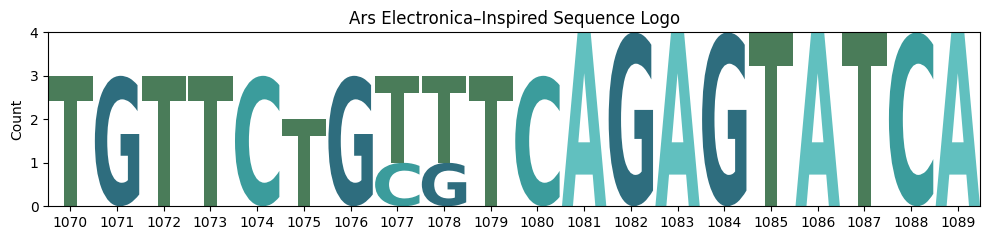

In [82]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Your DataFrame assumed loaded as comparsions_df
seqs = comparsions_df.loc[1, ['11.2019_Seq', '06.2022_Seq', '09.2023_Seq', '05.2025_Seq']].tolist()

assert all(len(seq) == len(seqs[0]) for seq in seqs), "Sequences must be aligned!"

seq_array = np.array([list(s) for s in seqs])
length = seq_array.shape[1]
bases = ['A', 'C', 'G', 'T']

counts_matrix = []
for i in range(length):
    col = seq_array[:, i]
    counts = Counter(col)
    counts_row = {base: counts.get(base, 0) for base in bases}
    counts_matrix.append(counts_row)

counts_df = pd.DataFrame(counts_matrix)
counts_df = counts_df.iloc[1070:1090]

# --- Define your custom color scheme ---
custom_color_scheme = {
    'A': '#61C0BF',   # Neon Green
    'C': '#3B9C9C',   # Electric Cyan
    'G': '#2E6D7E',   # Magenta
    'T': '#4A7C59',   # Signal Yellow
}

# --- Plot ---
plt.figure(figsize=(20, 4))
logo = logomaker.Logo(counts_df, color_scheme=custom_color_scheme)
logo.style_xticks(anchor=0, spacing=1)
logo.ax.set_ylabel("Count")
plt.title("Ars Electronica–Inspired Sequence Logo")
plt.tight_layout()
plt.show()


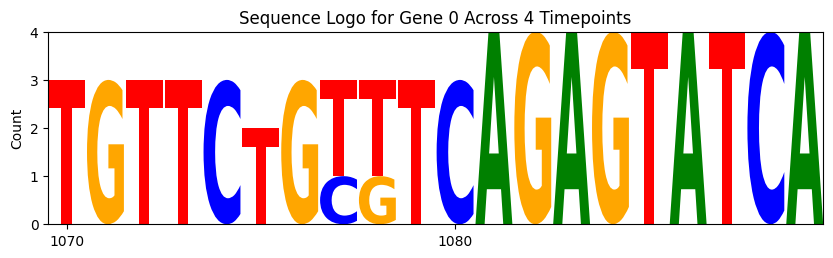

In [77]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

# Extract the first gene's 4 sequencing results
seqs = comparsions_df.loc[1, ['11.2019_Seq', '06.2022_Seq', '09.2023_Seq', '05.2025_Seq']].tolist()

# Make sure all sequences are same length
assert all(len(seq) == len(seqs[0]) for seq in seqs), "Sequences must be aligned!"

# Create a DataFrame suitable for logomaker (counts per position)
import numpy as np
from collections import Counter

seq_array = np.array([list(s) for s in seqs])  # shape: (4, N)
length = seq_array.shape[1]

# Count bases at each position
counts_matrix = []
bases = ['A', 'C', 'G', 'T']
for i in range(length):
    col = seq_array[:, i]
    counts = Counter(col)
    counts_row = {base: counts.get(base, 0) for base in bases}
    counts_matrix.append(counts_row)

counts_df = pd.DataFrame(counts_matrix)
counts_df = counts_df.iloc[1070:1090]

# Plot with logomaker
# plt.figure(figsize=(40, 4))

logo = logomaker.Logo(counts_df, color_scheme='classic')
logo.style_xticks(anchor=0, spacing=10)
logo.ax.set_ylabel("Count")
plt.title("Sequence Logo for Gene 0 Across 4 Timepoints")
plt.show()


In [75]:
counts_df

,A,C,G,T
1060,0,0,0,3
1061,0,0,3,0
1062,0,0,0,3
1063,0,0,0,3
1064,0,3,0,0
...,...,...,...,...
4897,0,4,0,0
4898,0,4,0,0
4899,0,4,0,0
4900,4,0,0,0


Found 141 variable positions out of 4902


<Figure size 28200x50 with 0 Axes>

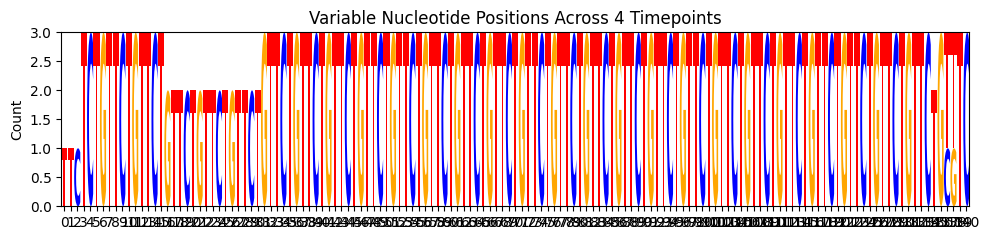

[940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 990,
 991,
 992,
 993,
 994,
 995,
 996,
 997,
 998,
 999,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1020,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1027,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1034,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1047,
 1048,
 1049,
 1050,
 1051,
 1052,
 1053,
 1054,
 1055,
 1056,
 1057,
 1058,
 1059,
 1060,
 1061,
 1062,
 1063,
 1064,
 1065,
 1066,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080]

In [73]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Assuming comparsions_df is already loaded
seqs = comparsions_df.loc[1, ['11.2019_Seq', '06.2022_Seq', '09.2023_Seq', '05.2025_Seq']].tolist()

# Make sure all sequences are same length
assert all(len(seq) == len(seqs[0]) for seq in seqs), "Sequences must be aligned!"

# Convert to numpy array of shape (4, N)
seq_array = np.array([list(s.upper()) for s in seqs])
length = seq_array.shape[1]
bases = ['A', 'C', 'G', 'T']

# Identify variable positions
variable_positions = []
for i in range(length):
    unique_bases = set(seq_array[:, i])
    if len(unique_bases) > 1:
        variable_positions.append(i)

print(f"Found {len(variable_positions)} variable positions out of {length}")

# If no variable positions, skip plotting
if variable_positions:
    # Count bases at each variable position
    counts_matrix = []
    for i in variable_positions:
        col = seq_array[:, i]
        counts = Counter(col)
        counts_row = {base: counts.get(base, 0) for base in bases}
        counts_matrix.append(counts_row)

    # Build DataFrame without custom index
    counts_df = pd.DataFrame(counts_matrix)

    # Plot with logomaker
    plt.figure(figsize=(2 * len(variable_positions), 0.5))
    logo = logomaker.Logo(counts_df, color_scheme='classic')
    logo.style_xticks(anchor=0, spacing=1)
    logo.ax.set_ylabel("Count")
    plt.title("Variable Nucleotide Positions Across 4 Timepoints")
    plt.tight_layout()
    plt.show()

else:
    print("✅ No variable positions found — nothing to plot.")
variable_positions
